## Project II - Regression Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'low fat', 'Regular', 'reg'],['LF','LF','REG','REG'])

In [4]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [5]:
avg = df['Item_Weight'].mean()
df['Item_Weight'].fillna(value=avg, inplace=True)

In [6]:
df['Outlet_Size'].fillna(value='Medium', inplace=True)

In [7]:
df = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [8]:
df_real = pd.get_dummies(df, drop_first=True)
df_real

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_REG,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,549.2850,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0


In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [10]:
X = df_real.drop(['Item_Outlet_Sales'], axis=1)
y = np.array(df_real['Item_Outlet_Sales']).reshape(-1,1)

In [11]:
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

## 49

In [14]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train,y_train)

C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [15]:
predicted = sc_y.inverse_transform(svr_regressor.predict(X_test))
predicted

array([2820.97823963, 4627.2369833 , 3736.74823975, ..., 1805.51602618,
       2882.15484793, 2956.06298678])

In [16]:
y_real = sc_y.inverse_transform(y_test)

## 50

In [17]:
from sklearn import metrics

In [18]:
print('MAE:', metrics.mean_absolute_error(y_real, predicted))
print('MSE:', metrics.mean_squared_error(y_real, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_real, predicted)))
print('R2:', metrics.r2_score(y_real, predicted))

MAE: 788.7282506796728
MSE: 1263385.4347033454
RMSE: 1124.0041969242577
R2: 0.5717803754794806


## 51

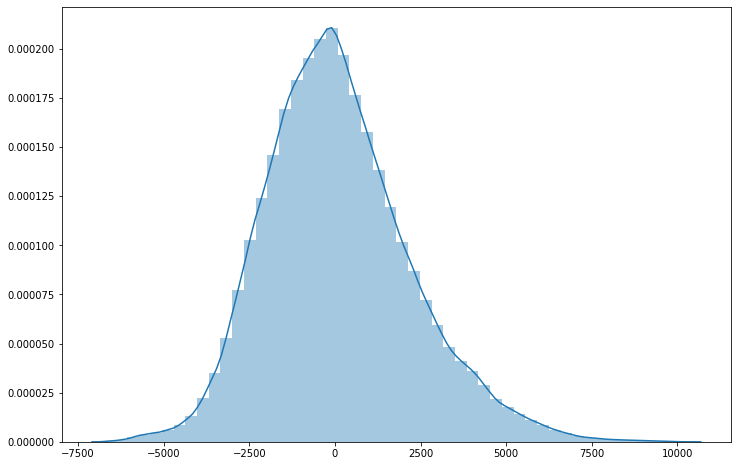

In [19]:
fig=plt.figure(figsize=(12,8))
sns.distplot((y_real-predicted), bins=50)

## 52

In [20]:
dict_compare = {'Sales': y_real.flatten(), 'Predicted': predicted.flatten()}
df_predicted = pd.DataFrame(dict_compare)
df_predicted

,Sales,Predicted
0,4426.2384,2820.978240
1,4845.0266,4627.236983
2,2293.0152,3736.748240
3,1065.2800,1457.518693
4,2345.6134,2810.947966
...,...,...
1700,3207.8244,2459.631919
1701,2263.7200,1622.715429
1702,1906.8512,1805.516026
1703,2773.0570,2882.154848


In [21]:
print(df_predicted.to_string())

           Sales    Predicted
0      4426.2384  2820.978240
1      4845.0266  4627.236983
2      2293.0152  3736.748240
3      1065.2800  1457.518693
4      2345.6134  2810.947966
5       322.2472   369.421958
6      1860.2452  1187.855457
7       209.7270   540.779946
8      4377.6350  4442.360209
9       322.9130   940.519566
10      314.2576   589.875096
11       56.5930   129.358945
12     2407.5328  2249.206026
13     1647.8550  2211.356363
14     3560.6984  2109.512050
15      569.2590  1666.016829
16     4339.0186  3802.904055
17     2402.2064  1689.811061
18     4500.8080  2894.652966
19     4647.2840  3098.583922
20     2233.0932  1316.686806
21     1603.9122  2162.779874
22     2763.0700  1436.115803
23     6239.8776  4673.890773
24      588.5672   455.212208
25     1565.9616  2864.674028
26     4175.8976  3976.822035
27     1631.2100  3067.156035
28     1539.9954  2750.507289
29      745.6960  1538.489025
30     3775.0860  3713.965575
31     1491.3920  2123.258735
32     313

## 53

In [22]:
df_predicted.corr()

,Sales,Predicted
Sales,1.000000,0.758823
Predicted,0.758823,1.000000
